In [1]:
import time
import cv2
import math

import numpy as np

from swarm import Swarm


In [2]:
NUM_DRONES = 5

AREA_SIZE_X = 100
AREA_SIZE_Y = 100
GRID_SIZE = 100           # Size of the Forest

CAMERA_FOV_DEGREE = 50
IMAGE_SIZE = 512 #How many Scanning points each image has per Row (Images are 512x512)

MOVE_DISTANCE = 1       # How far a Drone can move each Timestep
DRONE_HEIGHT = 35

TIMESTEPS = 10
POPULATION_SIZE = 10
NUM_GENERATIONS = 10
MUTATION_RATE = 0.1

INITIAL_VISIBILITY =0.5

In [3]:
grid_offset=GRID_SIZE/2

camera_fov=np.deg2rad(CAMERA_FOV_DEGREE)
camera_offset= 35 * np.tan(camera_fov/2)

prob_array_size= int(np.ceil((GRID_SIZE*512)/(camera_offset*2)))

In [4]:
#Create "Base Grid"
#by Calculating distance between each scanning point at DRONE_HEIGHT

#Gives Coordinates based on drone position and scan pixel
def calculate_world_coordinates(drone_pos, image_radius, img_x, img_y):
    pos_x = drone_pos[0] + (img_x-256)/512 * image_radius * 2
    pos_y = drone_pos[1] + (img_y-256)/512 * image_radius * 2
    return (pos_x, pos_y)
#print(calculate_world_coordinates(np.array([0.5,-0.46815]),camera_offset,0,512))


    return array_width,array_height
def getOverlapArray(waypoints,img_width=512,img_height=512):
    #TODO change MinX to value instead of array,its probably not needed 
    MinX = [0,float('inf')]
    MaxX = [0,float('-inf')]
    MinY = [0,float('inf')]
    MaxY = [0,float('-inf')]
    
    for i in range(len(waypoints)):
        x = waypoints[i][0]
        y = waypoints[i][1]
        #Determine the Minimum X,Y and Maximum X,Y of the sampling positions and saves which drone
        if (x < MinX[1]):
            MinX = [i, x]
        if (x > MaxX[1]):
            MaxX = [i, x]
        if (y < MinY[1]):
            MinY = [i, y]
        if (y > MaxY[1]):
            MaxY = [i, y]
    
    print(MinX,MaxX)
    
    MinX[1] = calculate_world_coordinates(waypoints[MinX[0]], camera_offset, 0,0)[0]
    MaxX[1] = calculate_world_coordinates(waypoints[MaxX[0]], camera_offset, img_width,img_height)[0]
    MinY[1] = calculate_world_coordinates(waypoints[MinY[0]], camera_offset, 0,0)[1]
    MaxY[1] = calculate_world_coordinates(waypoints[MaxY[0]], camera_offset, img_width, img_height)[1]  
    
    #gets the needed width/height of the array based on the distance between smallest and largest X/Y Value, rounding up
    array_width = int(np.ceil(((MaxX[1]-MinX[1])*img_width)/(camera_offset*2)))
    array_height = int(np.ceil(((MaxY[1]-MinY[1])*img_height)/(camera_offset*2)))
    print(array_width,array_height)
    #fills the array with zeroes
    visibility_array = np.zeros((int(array_width), (int(array_height))))
    
    visibility_threshold= 3400 #once depth is higher than this value, the ground counts as seen
    
    #adds 1/NUM_DRONES if the point is seen
    for id in range(len(waypoints)):
        for i in range(img_width):
            for j in range(img_height):
                if swarm.depth_images[id][i][j][0] > visibility_threshold:
                    world_x, world_y = calculate_world_coordinates(waypoints[id], camera_offset, j, i)
                    world_x_idx = int(((world_x - MinX[1]) / (MaxX[1] - MinX[1])) * array_width)
                    world_y_idx = int(((world_y - MinY[1]) / (MaxY[1] - MinY[1])) * array_height)
                    if 0 <= world_x_idx < array_width and 0 <= world_y_idx < array_height:
                        visibility_array[world_x_idx][world_y_idx] += 1/NUM_DRONES
    
    
    #gets the corner of the visibility array, so correct overlap with probability array can be calculated

    visibility_offset_x=int(((MinX[1]+grid_offset)/GRID_SIZE)*prob_array_size)
    visibility_offset_y=int(((MinY[1]+grid_offset)/GRID_SIZE)*prob_array_size)
    
    visibility_offset=[visibility_offset_x,visibility_offset_y]
    return visibility_array, visibility_offset
    


In [5]:
def getProbabilityGrid(Last_Known_Position):
    #Create Target Probability Grid
    x = np.linspace(-grid_offset, grid_offset, prob_array_size)
    y = np.linspace(-grid_offset, grid_offset, prob_array_size)
    x, y = np.meshgrid(x, y)

    sigma= 10

    prob_density = (1 / (np.sqrt(2 * np.pi)* sigma)) * np.exp(-((x - Last_Known_Position[0])**2 + (y - Last_Known_Position[1])**2) / (2 * sigma**2))
    return prob_density,x,y

In [6]:
#return percentage of ground visible (depth>34meter)
def check_ground_visibility(depth_image):
    number_visible_ground=0
    for i in depth_image:
        for j in i:
            if j[0]>3400:
                number_visible_ground= number_visible_ground+1
    return number_visible_ground/(512**2)
 
def update_Target_Position():
    if Target_Position[0]<25:
        Target_Position = Target_Position + [0.5,0.5]

In [7]:
def mutate(solution):
    return null

# Waypints in Solution get randomized
def crossover(parent1, parent2):
    return null

Initialization of Drones and Solution Populations

In [8]:
#Spawn Drones and move to initial position

# Create the swarm object by passing the name
# of the world from the .sdf world file.
swarm = Swarm("rhea_swarm")

# Spawn X drones and keep the returning ids as handles
ids = swarm.spawn(NUM_DRONES)

#Create Fake Person Location
person_waypoint =np.array([5,5])

# First waypoints
waypoints = np.empty((0,3),float)
for i in range (NUM_DRONES):
    waypoints= np.append(waypoints,np.array([[math.ceil(i-(NUM_DRONES/2)),0.0,DRONE_HEIGHT]]), axis=0)

#create Initial
swarm.waypoints(ids, waypoints)

#Initialize Target Position
Target_Position = [10,10]

Last_Known_Position = Target_Position

#Visibility by Coordiantes File:
grid_visibility = np.full((AREA_SIZE_X,AREA_SIZE_Y), INITIAL_VISIBILITY)

#Create Target Probability Grid
sigma= 10

prob_density = getProbabilityGrid(Last_Known_Position)



Subscribed successfully


In [10]:
#print(swarm.depth_images[1])
print(check_ground_visibility(swarm.depth_images[1]))


0.7130775451660156


In [11]:
# Problem classes
from pymoo.core.problem import Problem, ElementwiseProblem
from pymoo.problems.functional import FunctionalProblem
from pymoo.optimize import minimize

# Algorithmss
from pymoode.algorithms import DE, GDE3, NSDE, NSDER
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.algorithms.moo.nsga2 import NSGA2

# Reference directions and test problems
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions

# Survival operators
from pymoode.survival import RankAndCrowding, ConstrRankAndCrowding

# Termination
from pymoo.termination.default import DefaultSingleObjectiveTermination, DefaultMultiObjectiveTermination

# Performance
from pymoode.performance import SpacingIndicator


In [34]:
class MyProblem(Problem):

    def __init__(self, grid_size, n_drones, n_steps,waypoints,prob_density):
        
        self.grid_size = grid_size
        self.n_drones = n_drones
        n_var=2*n_drones
        self.n_steps = n_steps
        
        self.waypoints = waypoints
        self.prob_density = prob_density
        
        super().__init__(
            n_var=n_var,  # Variables in the solutions (x,y)
            n_obj=2,      # Number of Objectives we wanna optimize
            n_constr=0,   # No additional constraints, TODO: add no crashing into eachother
            xl=0,      # Lower boundaries of solution variables
            xu=1,       # Upper bounds of solution vars
            vtype=int)    

        #x are the waypoints
    def _evaluate(self, x, out, *args, **kwargs):
        
        _x= np.array(x)*4-2
        #reshapes the variables back into a waypoint array
        coordinates = _x.reshape(-1, 2)        
        
        #send drones to solution it wants to score
        tempWaypoints = waypoints + np.pad(coordinates,((0, 0), (0, 1)),mode='constant',constant_values=0)
        swarm.waypoints(ids,tempWaypoints)
        
        isScored = false
        score = None
        
        while not isScored:
            #wait until all drones recieved
            if swarm.received_frames[ids[-1]]:
                
                visibility_grid,visibility_offset = getOverlapArray(tempwaypoints)
                
                score = scoreThatThing(self.prob_density,visibility_grid,visibility_offset)
                isScored=true
        
        out["F"] = -score

In [35]:
problem = MyProblem(GRID_SIZE, NUM_DRONES, NUM_GENERATIONS, waypoints, prob_density)

algorithm = DE(
    pop_size=10,
    sampling="lhs",    #Für initiale Population
    variant="DE/rand/1/bin",
    CR=0.9,
    F=0.8,
    dither="vector"
    #wieviel schritte in zukunft
)

In [43]:
def scoreThatThing(prob_density,visibility_grid,visibility_offset):
    #scoring_array=np.array(prob_density)
    scoring_array=np.zeros(prob_density.shape)
    score=0
    for i in range(visibility_grid.shape[0]):
        for j in range(visibility_grid.shape[1]):
            #
            #scoring_array[i+visibility_offset[0]][j+visibility_offset[1]]*=visibility_grid[i][j]
            scoring_array[i+visibility_offset[0]][j+visibility_offset[1]]=prob_density[i+visibility_offset[0]][j+visibility_offset[1]]*visibility_grid[i][j]
            #only add score if half the drones see square
            if visibility_grid[i][j]>=0.5:
                score+=scoring_array[i+visibility_offset[0]][j+visibility_offset[1]]
                
    plt.imshow(scoring_array, cmap='gray')
    plt.show()
    return score

In [ ]:
finished=False
#Drone waypoints got from -25 to 25, Array from 0 to 50
#waypoints=np.array([[-5,0,35.],[-2,0,35.],[ 0,0,35.],[ 2,0,35.],[5,15,35.]])
#swarm.waypoints(ids,waypoints)

visibility_grid= "Null"

while not finished:
    #wait until all drones recieved
    if swarm.received_frames[ids[-1]]:
        
        #get best solution
        res = minimize(problem, algorithm, ('n_gen', 1), seed=1, verbose=True)
        best_solution = res.X.reshape(-1, 2)
        
        #update waypoints
        waypoints = waypoints + np.pad(best_solution,((0, 0), (0, 1)),mode='constant',constant_values=0)
        swarm.waypoints(ids,waypoints)
        
        #update probability_grid and waypoints
        problem.waypoints = waypoints
        problem.prob_density = getProbabilityGrid(Last_Known_Position)
        
        #problem = MyProblem(GRID_SIZE, NUM_DRONES, NUM_GENERATIONS, self.waypoints, self.prob_density)
        

[0, -5.0] [4, 5.0]
669 748


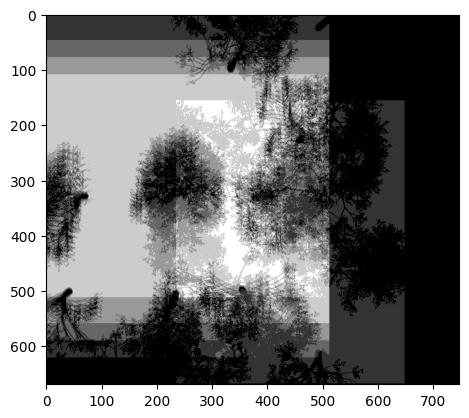

offset [449, 528]
visibility: (669, 748)
probability: (1569, 1569)


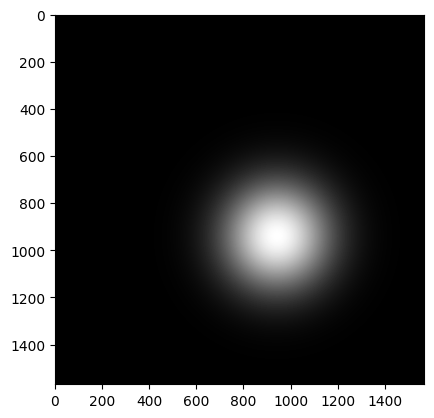

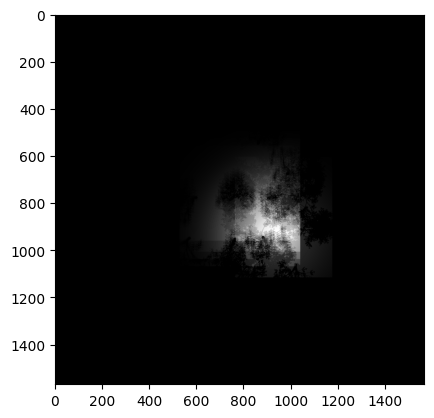

Score: 1430.5194806674267


In [44]:
#OLD ONE


finished=False
#Drone waypoints got from -25 to 25, Array from 0 to 50
#waypoints=np.array([[-5,0,35.],[-2,0,35.],[ 0,0,35.],[ 2,0,35.],[5,15,35.]])
#swarm.waypoints(ids,waypoints)

visibility_grid= "Null"

while not finished:
    #wait until all drones recieved
    if swarm.received_frames[ids[-1]]:
        visibility_grid,visibility_offset = getOverlapArray(waypoints)        
        
        import matplotlib.pyplot as plt 
        plt.imshow(visibility_grid, cmap='gray') 
        plt.show()
                

        #Find new best waypoints
        #best_solution = result.X
        #best_fitness = result.F
        #print("Best Solution: {} \n with a Score of {}".format(best_solution,best_fitness))
        
        #Move Drones to best waypoints
        #current_waypoints = best_solution
        #swarm.waypoints(ids, current_waypoints)
        
        #Update Target Model:
        sigma=sigma+0.5
        prob_density,x,y = getProbabilityGrid(Last_Known_Position)
        
        print("offset", visibility_offset)
        print("visibility:",visibility_grid.shape)        
        print("probability:",prob_density.shape)
        
        #Move Target-Person
        #update_Target_Position()
        #print("Moving Target to {}".format(Target_Position))
        plt.imshow(prob_density, cmap='gray')
        plt.show()
        
        whatever = scoreThatThing(prob_density,visibility_grid,visibility_offset)
        
        print("Score:",whatever)
        
        finished=True
        
        #if StopCondition:
            #finished=True